# Modeling - selection of the best models with class weights

#### Importing nessesary libraries:

In [1]:
import functions
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

#### Loading sets:

In [2]:
data_scaled = pd.read_csv(r'./data/data_scaled.csv', delimiter = ';')

#### Split dataset into train and test subsets:

In [3]:
y = data_scaled['y']
X_scaled = data_scaled.drop(['y'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 100, stratify = y)

#### Resampling Techniques - oversampling minority class

In [4]:
X_train, y_train = functions.upsample(X_train, y_train)

## Examinig baseline models with class weights

In [5]:
results_wcw = {}

#### Logistic Regression (with class weights):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.36      0.61      0.45       928

    accuracy                           0.83      8236
   macro avg       0.65      0.73      0.67      8236
weighted avg       0.88      0.83      0.85      8236

Confusion Matrix:
AUC: 0.47
MAE: 0.17
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


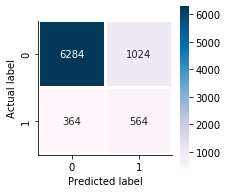

In [6]:
model_LR_wcw = functions.vis_results(LogisticRegression(), X_train, X_test, y_train, y_test)
results_wcw.update(dict(functions.model_result(model_LR_wcw)))

#### Decision Tree Classifier (with class weights):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7308
           1       0.31      0.33      0.32       928

    accuracy                           0.84      8236
   macro avg       0.61      0.62      0.61      8236
weighted avg       0.85      0.84      0.84      8236

Confusion Matrix:
AUC: 0.23
MAE: 0.16
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


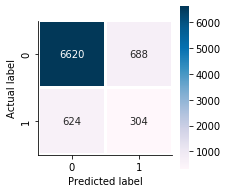

In [7]:
model_DTC_wcw = functions.vis_results(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)
results_wcw.update(dict(functions.model_result(model_DTC_wcw)))

#### Random Forest Classifier (with class weights):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7308
           1       0.46      0.38      0.42       928

    accuracy                           0.88      8236
   macro avg       0.69      0.66      0.67      8236
weighted avg       0.87      0.88      0.87      8236

Confusion Matrix:
AUC: 0.33
MAE: 0.12
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


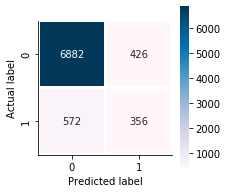

In [8]:
model_RFC_wcw = functions.vis_results(RandomForestClassifier(), X_train, X_test, y_train, y_test)
results_wcw.update(dict(functions.model_result(model_RFC_wcw)))

#### SVM (with class weights):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7308
           1       0.39      0.58      0.46       928

    accuracy                           0.85      8236
   macro avg       0.66      0.73      0.69      8236
weighted avg       0.88      0.85      0.86      8236

Confusion Matrix:
AUC: 0.46
MAE: 0.15
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


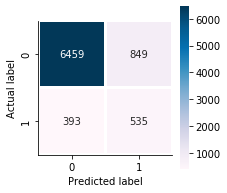

In [9]:
model_SVM_wcw = functions.vis_results(SVC(), X_train, X_test, y_train, y_test)
results_wcw.update(dict(functions.model_result(model_SVM_wcw)))

#### KNeighbors Classifier (with class weights):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      7308
           1       0.25      0.54      0.34       928

    accuracy                           0.76      8236
   macro avg       0.59      0.67      0.60      8236
weighted avg       0.85      0.76      0.80      8236

Confusion Matrix:
AUC: 0.34
MAE: 0.24
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


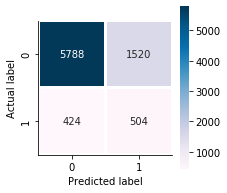

In [10]:
model_KNC_wcw = functions.vis_results(KNeighborsClassifier(), X_train, X_test, y_train, y_test)
results_wcw.update(dict(functions.model_result(model_KNC_wcw)))

#### XGB Classifier (with class weights):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.36      0.61      0.45       928

    accuracy                           0.83      8236
   macro avg       0.65      0.74      0.68      8236
weighted avg       0.88      0.83      0.85      8236

Confusion Matrix:
AUC: 0.47
MAE: 0.17
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


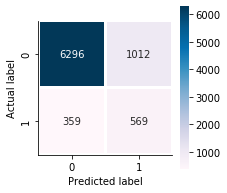

In [11]:
model_XGB_wcw = functions.vis_results(XGBClassifier(), X_train, X_test, y_train, y_test)
results_wcw.update(dict(functions.model_result(model_XGB_wcw)))

### Results:

In [12]:
results_wcw = pd.DataFrame(data=results_wcw).T
results_wcw.reset_index(inplace=True)
results_wcw.columns = ['Model', 'ACC', 'AUC', 'PRECISION_ALL', 'RECALL_ALL', 'F1_ALL', 'PRECISION_1', 'RECALL_1', 'F1_1', 'MAE']
results_wcw

,Model,ACC,AUC,PRECISION_ALL,RECALL_ALL,F1_ALL,PRECISION_1,RECALL_1,F1_1,MAE
0,LogisticRegression,0.831472,0.467638,0.878758,0.831472,0.849591,0.355164,0.607759,0.448331,0.168528
1,DecisionTreeClassifier,0.840699,0.233443,0.845419,0.840699,0.843004,0.306452,0.327586,0.316667,0.159301
2,RandomForestClassifier,0.878825,0.325328,0.870528,0.878825,0.874251,0.455243,0.383621,0.416374,0.121175
3,SVC,0.849199,0.460335,0.879987,0.849199,0.861642,0.386561,0.576509,0.462803,0.150801
4,KNeighborsClassifier,0.763963,0.335112,0.854817,0.763963,0.798213,0.249012,0.543103,0.341463,0.236037
5,XGBClassifier,0.833536,0.474668,0.880010,0.833536,0.851305,0.359899,0.613147,0.453567,0.166464


### Save results:

In [13]:
results_wcw.to_csv(r'./results/results_wcw.csv', sep=';', index=False)

### Save models:

In [14]:
with open(f'./models/model_LR_wcw.pickle', 'wb') as f:
    pickle.dump(model_LR_wcw[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_DTC_wcw.pickle', 'wb') as f:
    pickle.dump(model_DTC_wcw[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_RFC_wcw.pickle', 'wb') as f:
    pickle.dump(model_RFC_wcw[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_SVM_wcw.pickle', 'wb') as f:
    pickle.dump(model_SVM_wcw[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_KNC_wcw.pickle', 'wb') as f:
    pickle.dump(model_KNC_wcw[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_XGB_wcw.pickle', 'wb') as f:
    pickle.dump(model_XGB_wcw[0], f, pickle.HIGHEST_PROTOCOL)